In [21]:
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
from slugify import slugify
import ast
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import booleanize
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


In [17]:
playlists_df = pd.read_pickle("playlists.pkl")


In [19]:
cur_data = playlists_df[
    [
        'is_coding',
        'is_programming',
        'norm_followers',
        *playlists_df.columns[10:-1]
    ]
]

cur_scaler = StandardScaler()

cur_scaler.fit(cur_data)
cur_data = pd.DataFrame(
    cur_scaler.transform(cur_data),
    columns=cur_data.columns,
    index=cur_data.index
)

cur_data


,is_coding,is_programming,norm_followers,Billx,Blausch,Dr. Peacock,Lefa,Mandragora,Mind Against,PLK,...,DJ Antoine,Compuphonic,John Adams,Opia,Kings of Convenience,YUNGBLUD,Manatee Commune,Cigarettes After Sex,Modjo,The Cars
slug,,,,,,,,,,,,,,,,,,,,,
7jvfS7fn7qx2HS3oMklAdw,-1.353515,1.291116,-0.316937,11.068841,16.279780,5.284006,16.279780,3.477236,5.754926,15.791845,...,-0.036692,-0.058149,-0.022265,-0.0542,-0.038347,-0.041353,-0.027442,-0.046142,-0.057366,-0.022874
4IgAuc1ur86KtYZAEnD6Q3,0.738817,-0.774524,2.033309,-0.056194,-0.061426,-0.062172,-0.061426,-0.046777,-0.072561,-0.063324,...,-0.036692,-0.058149,-0.022265,-0.0542,-0.038347,-0.041353,-0.027442,-0.046142,-0.057366,-0.022874
4LMlI2WnTGDqtKU8bTNGFS,0.738817,-0.774524,-0.316937,-0.056194,-0.061426,-0.062172,-0.061426,-0.046777,-0.072561,-0.063324,...,-0.036692,-0.058149,-0.022265,-0.0542,-0.038347,-0.041353,-0.027442,-0.046142,-0.057366,-0.022874
4g4D9ayX9v2YWVx1ciKMFh,0.738817,-0.774524,-0.316937,-0.056194,-0.061426,-0.062172,-0.061426,-0.046777,-0.072561,-0.063324,...,-0.036692,-0.058149,-0.022265,-0.0542,-0.038347,-0.041353,-0.027442,-0.046142,-0.057366,-0.022874
21iTXBzTLFliu8uQT6Espl,-1.353515,1.291116,-0.316937,-0.056194,-0.061426,-0.062172,-0.061426,-0.046777,-0.072561,-0.063324,...,-0.036692,-0.058149,-0.022265,-0.0542,-0.038347,-0.041353,-0.027442,-0.046142,-0.057366,-0.022874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5rLHlv0Avd3mgbNmMDOnXv,0.738817,-0.774524,-0.316937,-0.056194,-0.061426,-0.062172,-0.061426,-0.046777,-0.072561,-0.063324,...,-0.036692,-0.058149,-0.022265,-0.0542,-0.038347,-0.041353,-0.027442,-0.046142,-0.057366,-0.022874
1p5ZeMzXpkEHYuM8zy2j3e,0.738817,-0.774524,-0.316937,-0.056194,-0.061426,-0.062172,-0.061426,-0.046777,-0.072561,-0.063324,...,-0.036692,-0.058149,-0.022265,-0.0542,-0.038347,-0.041353,-0.027442,-0.046142,-0.057366,-0.022874
7DiLUwsIPRhAwEiVnCu7oU,0.738817,1.291116,-0.316937,-0.056194,-0.061426,-0.062172,-0.061426,-0.046777,-0.072561,-0.063324,...,-0.036692,-0.058149,-0.022265,-0.0542,-0.038347,-0.041353,-0.027442,-0.046142,-0.057366,-0.022874


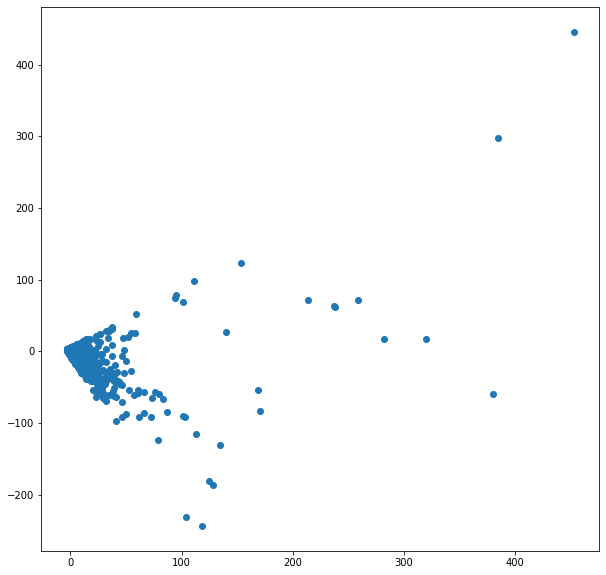

In [33]:
# Take all of the data and plot it on 2 dimensions
pca = PCA(n_components=2)
pca.fit(cur_data)
pcafeatures_train = pca.transform(cur_data)

# Create a plot of the PCA results
from itertools import cycle

def plot_PCA_2D(data):
    plt.figure(figsize=(10,10))
    plt.scatter(data[:, 0], data[:, 1])
    
plot_PCA_2D(pcafeatures_train)


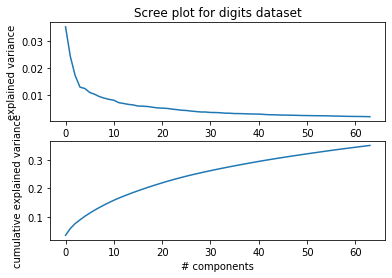

In [34]:
pca2 = PCA(n_components=64)
pca2.fit(cur_data)
pcafeatures_train2 = pca2.transform(cur_data)

plt.subplot(2,1,1)
plt.plot(pca2.explained_variance_ratio_)
plt.xlabel(' ')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');
# plt.xscale("log")

plt.subplot(2,1,2)
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title(' '); #Cumulative explained variance by PCA for digits');
# plt.xscale("log")